Use data to produce xsec plot

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
pd.__version__

'1.5.3'

In [5]:
import numpy as np

In [6]:
np.__version__

'1.23.5'

In [15]:
df_xsec = pd.read_csv("./cross_section_ratio.csv")
df_xsec.shape

(50, 2)

In [7]:
# write to csv file
# df_xsec.to_csv("cross_section_ratio.csv", index=False)

In [33]:
df_xsec.head(4)

,mass_ratio,xsec
0,0.02,5.320240e-40
1,0.04,5.205090e-40
2,0.06,5.090490e-40
3,0.08,4.976540e-40


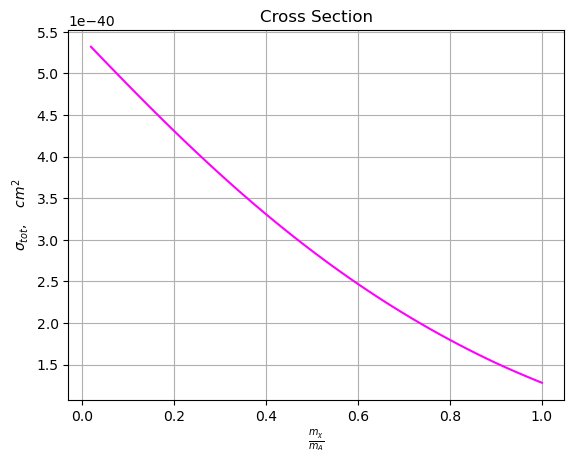

In [16]:
plt.xlabel(r'$\frac{m_{\chi}}{m_{A}}$')
plt.ylabel(r'$\sigma_{tot}, \quad cm^2$')
plt.title('Cross Section')
plt.plot(df_xsec.mass_ratio, df_xsec.xsec, color='magenta')
plt.grid()
plt.show()

Mass of $^{180}Ta$ in amu 
179.947464832  
convert to GeV, 1 amu = 0.9315 GeV, hence  
$m_{Ta} = 179.947464832 * 0.9315 = 167.621 \quad GeV$

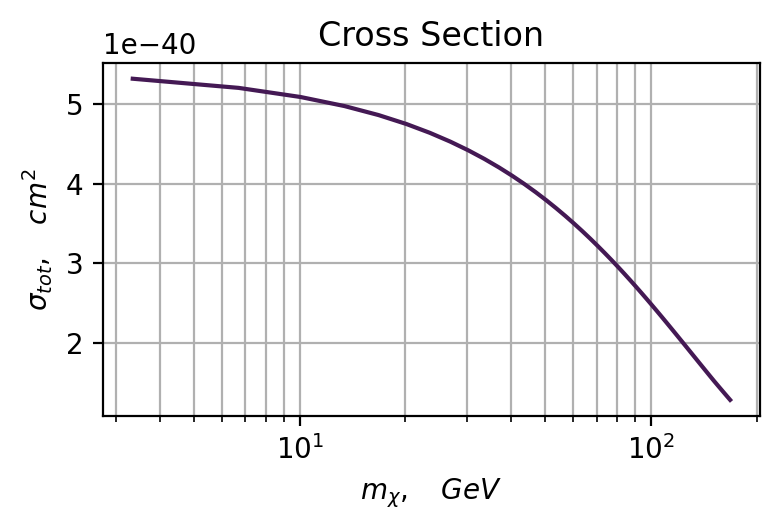

In [17]:
m_Ta = 167.621
color_hex = "#441954"

fig_width = 4
fig_height = 2.75

fig = plt.figure(figsize=(fig_width, fig_height), dpi=200)
plt.xlabel(r'$m_{\chi}, \quad GeV$')
plt.ylabel(r'$\sigma_{tot}, \quad cm^2$')
plt.semilogx()
plt.title('Cross Section')
plt.grid(which="both")
plt.plot(df_xsec.mass_ratio * m_Ta , df_xsec.xsec, color=color_hex)
plt.tight_layout()
plt.show()

fig.savefig("xsec_as_wimp_mass.pdf")

In [83]:
#simple interpolation
def func(x):
    return x ** np.sin(x)

In [94]:
x_values = np.arange(1, 10, 0.1)
x_values

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [99]:
y_values = func(x_values)
y_values

array([1.        , 1.08865298, 1.18522285, 1.28762989, 1.39316268,
       1.49847723, 1.59967938, 1.6924977 , 1.77254196, 1.83562751,
       1.87813065, 1.8973293 , 1.89167928, 1.86098269, 1.80641984,
       1.73043787, 1.63651251, 1.52881943, 1.41186328, 1.29011496,
       1.1677002 , 1.0481686 , 0.93435584, 0.82833623, 0.73145109,
       0.64439187, 0.56731566, 0.49997258, 0.44182962, 0.39218029,
       0.35023496, 0.31519041, 0.28628001, 0.26280751, 0.2441682 ,
       0.2298609 , 0.21949443, 0.21279123, 0.2095905 , 0.20985294,
       0.2136686 , 0.22126929, 0.233047  , 0.24957942, 0.27166401,
       0.3003615 , 0.33704963, 0.383487  , 0.44188544, 0.51498718,
       0.60613935, 0.71935348, 0.85933133, 1.03143065, 1.24153691,
       1.49580132, 1.80020447, 2.1599133 , 2.57842064, 3.05649486,
       3.59102217, 4.17388983, 4.79112223, 5.42252266, 6.04206765,
       6.61922959, 7.12125936, 7.51626311, 7.77669612, 7.8827329 ,
       7.82491315, 7.6055454 , 7.23856726, 6.74786473, 6.16436

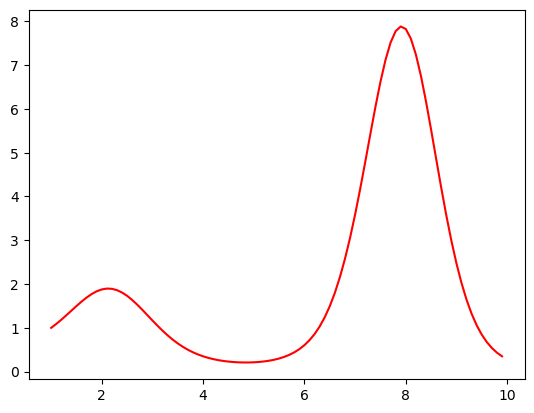

In [98]:
plt.plot(x_values, y_values, color="red")
plt.show()

In [19]:
import scipy as sp

In [20]:
sp.__version__

'1.10.1'

In [102]:
interpolation_func = sp.interpolate.BarycentricInterpolator(xi=x_values, yi=y_values)

In [118]:
x_test = [1.15, 1.23, 1.37, 2.01, 3.55, 4.72, 5.33, 6.22, 7.11, 7.88, 8.67, 9.83]

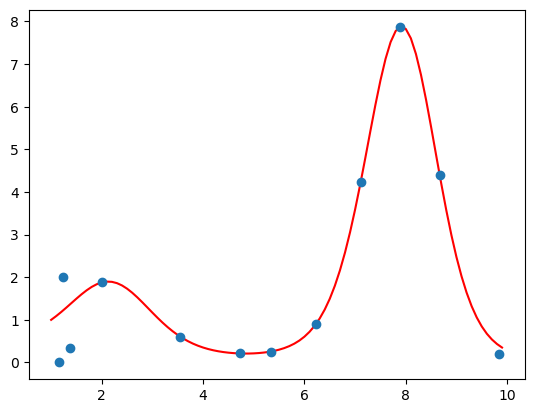

In [119]:
plt.plot(x_values, y_values, color="red")
plt.plot(x_test, interpolation_func(x_test), 'o')

## Interpolation function for Cross Section

In [21]:
xsec_interpolation = sp.interpolate.interp1d(df_xsec.mass_ratio * m_Ta , df_xsec.xsec,kind='cubic')

In [22]:
set_of_Xpoints = np.random.uniform(3.5, 167, 500)
set_of_Ypoints = xsec_interpolation(set_of_Xpoints)

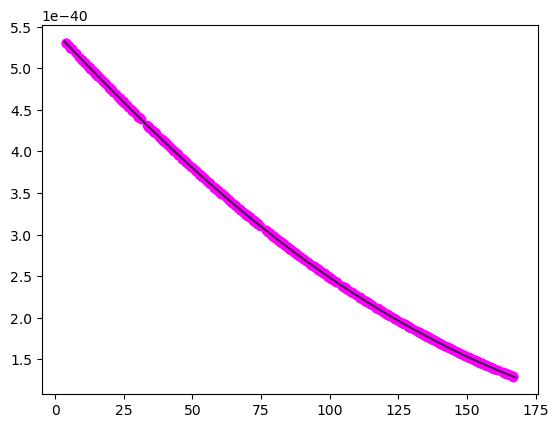

In [23]:
plt.plot(set_of_Xpoints, set_of_Ypoints, 'o', color='magenta')
plt.plot(df_xsec.mass_ratio * m_Ta , df_xsec.xsec, color=color_hex)
plt.show()

`interp1d` can be used for the case of cross section, agreement is very good.

Formula for calculation of the $T_{1/2}$:  


$$T_{1/2} = \frac{\phi \cdot \sigma_{N\chi} \cdot N_0 \cdot T \cdot \varepsilon \cdot \ln(2)}{n_{up}}$$

In [54]:
# list of parameters
eff = 1.
n_up = 3.09
N_0 = 1e22
# t_exp = np.arange(1, 11) * 365 * 24 * 3600
# t_exp = np.arange(1, 11) # in years
t_exp = [1, 3, 5, 7, 10]

In [24]:
def flux(wimp_mass):
    return 2.1e38 * m_Ta / wimp_mass

In [31]:
mass_points = np.arange(3.5, 167.5, 0.5)
# mass_points
# xsec_interpolation(mass_points)

In [33]:
np.log(2)

0.6931471805599453

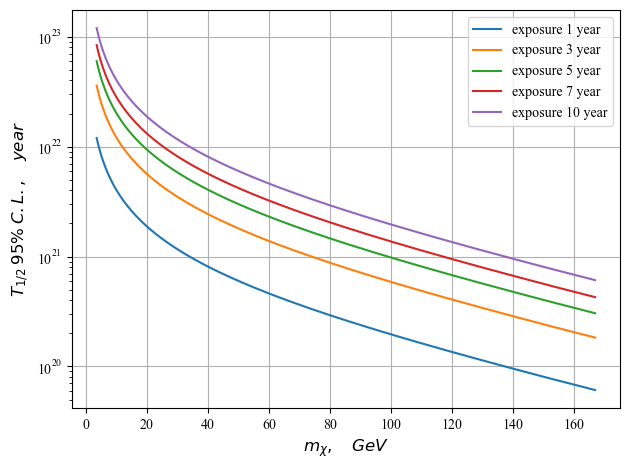

In [63]:
# font_style = {'font.family': 'sans-serif', 'font.sans-serif': ['Helvetica']}
font_style = {'font.family': 'serif', 'font.serif': ['Times New Roman']}
plt.rcParams.update(font_style)

set_of_Xpoints = mass_points


for time in t_exp:
    set_of_Ypoints = xsec_interpolation(mass_points) * flux(mass_points) * N_0 * time * eff * np.log(2) / n_up
    plt.plot(set_of_Xpoints, set_of_Ypoints, label=f"exposure {time} year")

plt.semilogy()
plt.legend()
plt.grid()
plt.xlabel(r'$m_{\chi}, \quad GeV$', fontsize=12, fontweight='bold')
plt.ylabel(r'$T_{1/2} \: 95\% \: C.L., \quad year$', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [56]:
# amu to kg
mass_for_exp = 1.6603145e-27 * N_0 * 179.947464832
mass_for_exp

0.002987693850988097